<a href="https://colab.research.google.com/github/jahez07/Bazel-learn/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow opencv-python matplotlib

In [3]:
import tensorflow as tf

In [4]:
import os
import cv2
import imghdr
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [5]:
os.listdir('drive/MyDrive/data')

['VP5', 'VP4', 'VP1', 'VP10', 'VP0', 'VP3', 'VP9', 'VP7', 'VP8', 'VP6', 'VP2']

In [6]:
# Avoid OMM errors by setting GPU Memmory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
data_dir = 'drive/MyDrive/data'

In [8]:
img = cv2.imread("drive/MyDrive/data/VP0/0b5ae0fdef800059e0511c6ba2168ade.jpg")

In [9]:
type(img)

numpy.ndarray

In [10]:
img.shape

(1080, 1920, 3)

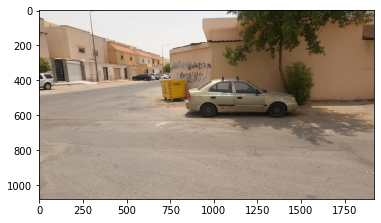

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [12]:
data = tf.keras.utils.image_dataset_from_directory('drive/MyDrive/data')

Found 9567 files belonging to 11 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

In [16]:
len(batch)

2

In [18]:
batch[0].shape

(32, 256, 256, 3)

In [19]:
batch[1]

array([ 4,  4,  3,  0,  9,  4,  4,  4,  5,  3,  3,  4,  4,  8, 10,  8,  3,
        4,  5,  4,  4, 10,  4,  4,  4,  3,  0, 10,  3,  5,  0,  5],
      dtype=int32)

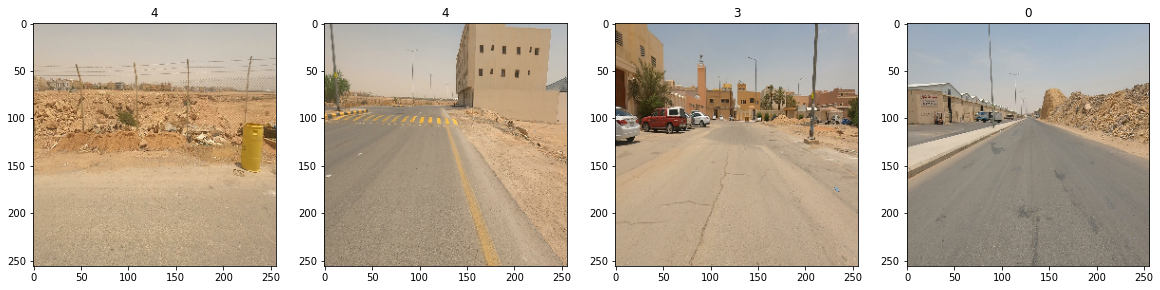

In [20]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# ***Scale Data***

In [21]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

# **Split Data**

In [23]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [24]:
train_size

209

In [25]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Build DeepLearning Model

In [26]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [28]:
model = Sequential()

In [29]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# **Train**

In [32]:
logdir='logs'

In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [34]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
209/209 [==============================] - 2632s 13s/step - loss: -7417018880.0000 - accuracy: 0.0088 - val_loss: -56528990208.0000 - val_accuracy: 0.0095
Epoch 2/20
209/209 [==============================] - 538s 3s/step - loss: -1069849509888.0000 - accuracy: 0.0087 - val_loss: -3654820560896.0000 - val_accuracy: 0.0106
Epoch 3/20
209/209 [==============================] - 537s 3s/step - loss: -14630299631616.0000 - accuracy: 0.0087 - val_loss: -33444222468096.0000 - val_accuracy: 0.0101
Epoch 4/20
209/209 [==============================] - 538s 3s/step - loss: -80743103463424.0000 - accuracy: 0.0087 - val_loss: -148897825554432.0000 - val_accuracy: 0.0095
Epoch 5/20
209/209 [==============================] - 540s 3s/step - loss: -280050440077312.0000 - accuracy: 0.0087 - val_loss: -455595232591872.0000 - val_accuracy: 0.0111
Epoch 6/20
209/209 [==============================] - 541s 3s/step - loss: -735255988273152.0000 - accuracy: 0.0088 - val_loss: -1087576584749056.000

# Plot Performance

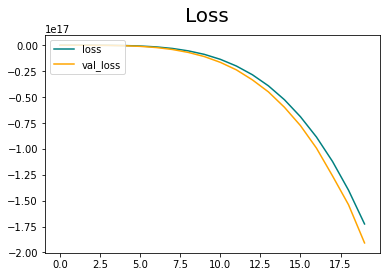

In [35]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

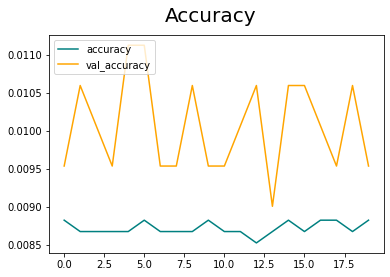

In [36]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [37]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [38]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [39]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 903ms/step


In [40]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9299569, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.005387931, shape=(), dtype=float32)


# Test

In [41]:
import cv2

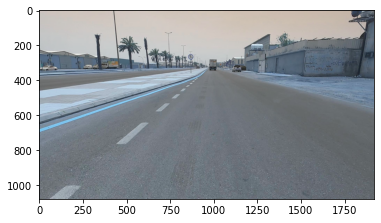

In [43]:
img = cv2.imread('drive/MyDrive/data/VP0/00bb84f0f10393189e229e52f4b2f652.jpg')
plt.imshow(img)
plt.show()

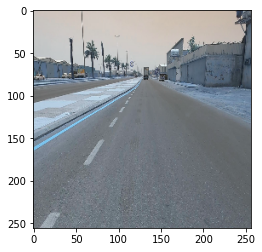

In [44]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [45]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 162ms/step


In [46]:
yhat

array([[1.]], dtype=float32)

# Saving the Model

In [48]:
from tensorflow.keras.models import load_model

In [49]:
model.save(os.path.join('drive/MyDrive/data','Visual Pollution.h5'))

In [52]:
new_model = load_model('drive/MyDrive/data/Visual Pollution.h5')

In [53]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 89ms/step


array([[1.]], dtype=float32)